In [25]:
import os
from glob import glob
import rasterio
import cv2
import numpy as np
import matplotlib.pyplot as plt 

data_dir = os.path.join('data', '2025-01-30_drones', 'DJI_202501230907_001_Brodie-7')


# Load some tiffs 

In [20]:
NIR_fns = glob(os.path.join(data_dir, '*NIR.TIF'))
print(NIR_fns)

['data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091018_0001_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091020_0002_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091022_0003_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091024_0004_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091026_0005_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091028_0006_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091030_0007_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091032_0008_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091034_0009_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJI_20250123091036_0010_MS_NIR.TIF', 'data\\2025-01-30_drones\\DJI_202501230907_001_Brodie-7\\DJ

In [ ]:
# Function to read single-band images
def read_single_band(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1)  # Read the first band

images = [read_single_band(path) for path in NIR_fns]

# Convert images to the required format for OpenCV
images_cv2 = [cv2.merge([img, img, img]) for img in images]  # Merge single band into a 3-channel image

# Create a Stitcher object
stitcher = cv2.Stitcher_create()

# Stitch images together
(status, stitched) = stitcher.stitch(images_cv2)

if status == cv2.Stitcher_OK:
    # Save the stitched image
    stitched_path = 'stitched_single_band_image.tif'
    cv2.imwrite(stitched_path, stitched)
    print(f'Successfully stitched the images and saved to {stitched_path}')
else:
    print('Image stitching failed')


c:\Users\jnicolow\AppData\Local\anaconda3\envs\frc\Lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091018_0001_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091020_0002_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091022_0003_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091024_0004_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091026_0005_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091028_0006_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091030_0007_MS_NIR.TIF' mode='r'>
<open DatasetReader name='data\2025-01-30_drones\DJI_202501230907_001_Brodie-7\DJI_20250123091032_0008_MS_NIR.TIF' mode='r'>


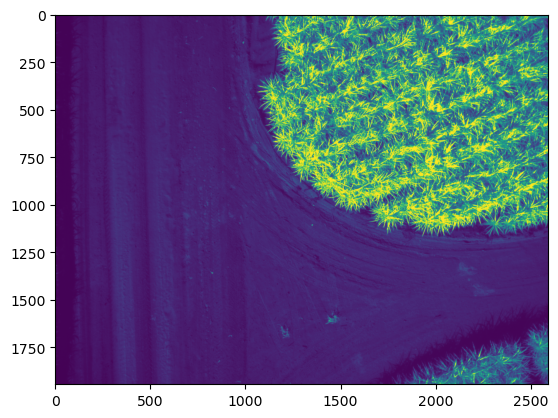

In [26]:
plt.imshow(images[0])